<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/Physics-based-loss-and-machine-learning-approach-in-application-to-non-Newtonian-fluids-flow-modelin/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Physics-based loss and machine learing approach in application to 2D fluids flow modelling**

The unknown function is the stream function ψ = ψ(x1, x2) that determines the velocity field **V** = [[v1, v2]], v1 = ∂ψ/∂x2, v2 = - ∂ψ/∂x1.



# Install libraries

In [34]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

# Import libraries

In [35]:
from fastai.vision.all import *
import cv2
from google.colab.patches import cv2_imshow


# Additional functions

Numerical derivative

In [36]:
def mydiff(j,y,dx):
  '''The function calculates the first order derivative in a specific direction 
     'dx' at a specific point 'j' for a given array 'y' 
     using parabolic approximation
  '''
  n = len(y)
  if j==0:
    dydx=(-y[3]+4*y[2]-3*y[1])/(2*dx)
  elif j==n:
    dydx=(3*y[j]-4*y[j-1]+y[j-2])/(2*dx)
  else:
    dydx=(y[j+1]-y[j-1])/(2*dx);
  return (dydx)

# Initialization

The flow domain of *'L x L'* size is represented as an *'imgSize x imgSize'* image.

In [37]:
L=0.1 # L x L flow domain
imgSize = 224 # imgSize x imgSize pixels image
x1 = torch.linspace(0,L,imgSize, dtype=torch.float64, requires_grad=False)
x2 = torch.linspace(0,L,imgSize, dtype=torch.float64, requires_grad=False)
#scaleFactor = 1e+4 # 1e+4 pixels per 1m when resolution is 128x128 

Boundary conditions. S1 is the upper wall with black label [0 0 0]. S2 and S4 are outlet and inlet surfaces, respectivelly. S3 is the lower wall with blue label [0 0 255]. 

In [38]:
x1[10]

tensor(0.0045, dtype=torch.float64)

In [39]:
Q = 1 #flow rate, m^3/s
psi = x1*Q # psi initialization
#psi.backward(x1[10])

Resize image

Path

In [40]:
 path =  Path('/content/gdrive/MyDrive/study/Publications/2022/IEEE-CEC-2022/physical-loss')
 imgPath = path/'ToyDataset'
 imgList = imgPath.ls()
 imgPath.ls()

(#3) [Path('/content/gdrive/MyDrive/study/Publications/2022/IEEE-CEC-2022/physical-loss/ToyDataset/Parallel plates and ball.png'),Path('/content/gdrive/MyDrive/study/Publications/2022/IEEE-CEC-2022/physical-loss/ToyDataset/Parallel plates with notch.png'),Path('/content/gdrive/MyDrive/study/Publications/2022/IEEE-CEC-2022/physical-loss/ToyDataset/Parallel plates.png')]

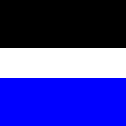

In [41]:
imgTest = Image.open(imgList[2]) 
imgTest


In [42]:
tensor(imgTest).shape

torch.Size([126, 126, 4])